<a href="https://colab.research.google.com/github/ekyuho/iot-class/blob/main/voltage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

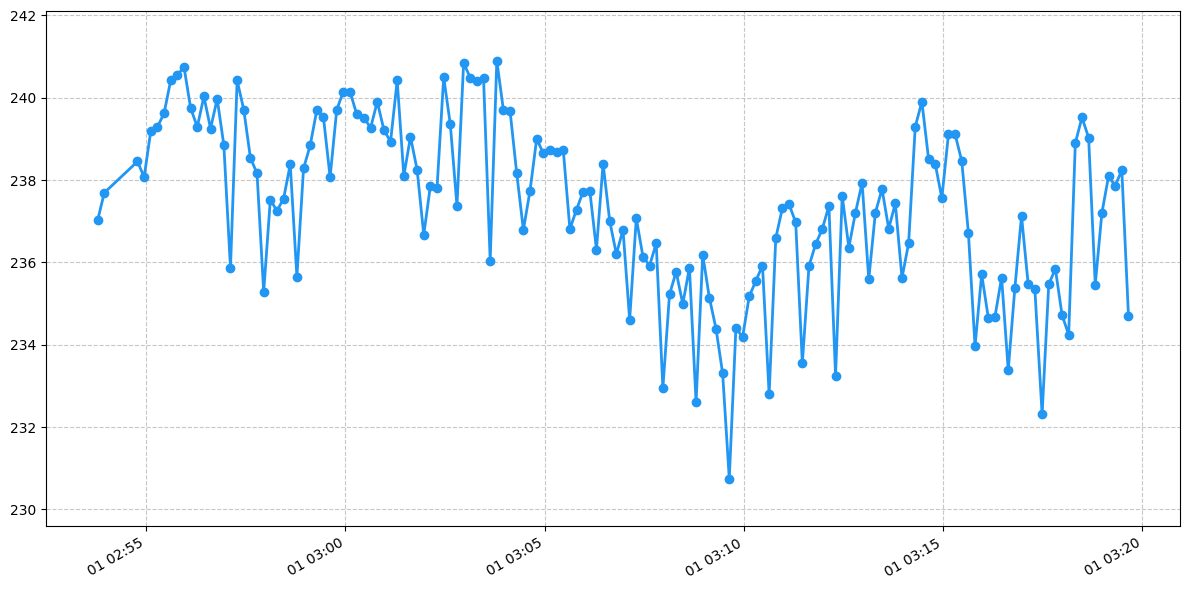

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import json
import re
import requests

r=requests.get('http://20.39.195.245:8000/voltage')
data_text=r.text

# 데이터 전처리
# 첫 줄은 헤더, 나머지는 데이터로 처리
lines = data_text.strip().split('\n')
if len(lines) == 1:  # 줄바꿈이 없는 경우
    lines = data_text.split('datetime')
    header = 'datetime' + lines[1].split('2025')[0]
    data_text = header + '\n' + '2025' + ''.join(lines[1:])
    # 공백을 기준으로 데이터 분리
    rows = data_text.strip().split()
    # 2개씩 묶어서 새로운 행 생성
    formatted_data = []
    for i in range(0, len(rows), 2):
        if i+1 < len(rows):
            formatted_data.append(' '.join([rows[i], rows[i+1]]))
    data_text = '\n'.join(formatted_data)

# StringIO를 사용하여 텍스트를 파일처럼 읽기
data_io = io.StringIO(data_text)

# pandas로 데이터 읽기
# CSV 형식처럼 읽기, 공백과 쉼표가 섞여 있으므로 유연하게 처리
df = pd.read_csv(data_io, sep=',', header=0, skipinitialspace=True)

# 열 이름 공백 제거
df.columns = df.columns.str.strip()

# datetime 열을 datetime 타입으로 변환
df['datetime'] = pd.to_datetime(df['datetime'])

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['voltage'], marker='o', linestyle='-', linewidth=2, color='#2196F3')

# 그래프 꾸미기
plt.grid(True, linestyle='--', alpha=0.7)

# x축 날짜 포맷 설정
plt.gcf().autofmt_xdate()

# y축 범위 설정 - 데이터 값보다 약간 넓게
voltage_min = df['voltage'].min() * 0.995
voltage_max = df['voltage'].max() * 1.005
plt.ylim(voltage_min, voltage_max)

# 각 데이터 포인트에 값 표시
if False:
  for i, v in enumerate(df['voltage']):
      plt.text(df['datetime'].iloc[i], v + 0.05, f'{v:.2f}',
              ha='center', va='bottom', fontsize=8, rotation=45)

plt.tight_layout()
plt.show()
